# 🦜🪞LangGraph-Reflection

This prebuilt graph is an agent that uses a reflection-style architecture to check and improve an initial agent's output.

## Installation

```
pip install langgraph-reflection
```

## Details

| Description | Architecture |
|------------|--------------|
| This reflection agent uses two subagents:<br>- A "main" agent, which is the agent attempting to solve the users task<br>- A "critique" agent, which checks the main agents work and offers any critiques<br><br>The reflection agent has the following architecture:<br><br>1. First, the main agent is called<br>2. Once the main agent is finished, the critique agent is called<br>3. Based on the result of the critique agent:<br>   - If the critique agent finds something to critique, then the main agent is called again<br>   - If there is nothing to critique, then the overall reflection agent finishes<br>4. Repeat until the overall reflection agent finishes | <img src="https://github.com/langchain-ai/langgraph-reflection/raw/main/langgraph-reflection.png" alt="Reflection Agent Architecture" width="100"/> |

We make some assumptions about the graphs:
- The main agent should take as input a list of messages
- The reflection agent should return a **user** message if there is any critiques, otherwise it should return **no** messages.

## Examples

Below are a few examples of how to use this reflection agent.

### LLM-as-a-Judge 

In this example, the reflection agent uses another LLM to judge its output. The judge evaluates responses based on:
1. Accuracy - Is the information correct and factual?
2. Completeness - Does it fully address the user's query?
3. Clarity - Is the explanation clear and well-structured?
4. Helpfulness - Does it provide actionable and useful information?
5. Safety - Does it avoid harmful or inappropriate content?

In [6]:
# Example query that might need improvement
example_query = [
    {
        "role": "user",
        "content": "Explain how nuclear fusion works and why it's important for clean energy",
    }
]

In [2]:
"""Example of LLM as a judge reflection system.

Should install: pip install langgraph-reflection langchain openevals
"""

from typing import TypedDict

from langchain.chat_models import init_chat_model

from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph_reflection import create_reflection_graph
from openevals.llm import create_llm_as_judge

In [3]:

# Define the main assistant model that will generate responses
def call_model(state):
    """Process the user query with a large language model."""
    model = init_chat_model(model="openai:gemini-pro")
    return {"messages": model.invoke(state["messages"])}


# Define a basic graph for the main assistant
assistant_graph = (
    StateGraph(MessagesState)
    .add_node(call_model)
    .add_edge(START, "call_model")
    .add_edge("call_model", END)
    .compile()
)


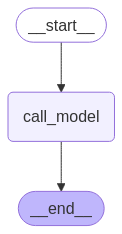

In [4]:
from IPython.display import Image, display

display(Image(assistant_graph.get_graph().draw_mermaid_png()))

In [7]:
# Process the query through the raw graph
result = assistant_graph.invoke({"messages": example_query})

In [8]:
from IPython.display import Markdown

Markdown(result["messages"][-1].content)

Let's break down nuclear fusion and its importance as a clean energy source.

**What is Nuclear Fusion?**

At its core, nuclear fusion is the process of **combining** two light atomic nuclei to form a heavier nucleus.  This is the opposite of nuclear fission, where a heavy nucleus is split into lighter ones.  Think of it like merging two small water droplets to create a larger one.

**How Does it Work?**

Here's a step-by-step breakdown of the fusion process, focusing on the type of fusion most promising for energy production (deuterium-tritium fusion):

1. **The Ingredients:** The most common and readily available fuels for fusion are isotopes of hydrogen:
   * **Deuterium (²H):** Hydrogen with one proton and one neutron in its nucleus. It's abundant in seawater.
   * **Tritium (³H):** Hydrogen with one proton and two neutrons. It's less abundant naturally but can be produced in a fusion reactor (we'll get to that later).

2. **Overcoming Repulsion:** Atomic nuclei are positively charged (due to protons).  This means they naturally repel each other, like trying to push two magnets together with their north poles facing each other.  To overcome this electrical repulsion and force the nuclei close enough to fuse, you need **extremely high temperatures**.

3. **Extreme Heat and Plasma:**  We're talking temperatures millions of degrees Celsius, many times hotter than the Sun's core! At these temperatures, atoms lose their electrons, forming a **plasma**, which is often called the fourth state of matter (after solid, liquid, and gas).  Plasma is a superheated, ionized gas where electrons and nuclei move independently.

4. **Fusion Occurs:**  In this superheated plasma, nuclei are moving incredibly fast.  When they collide with enough force (due to the heat), they can overcome the electrical repulsion and get close enough for the **strong nuclear force** to take over.  The strong nuclear force is a short-range, very powerful force that binds protons and neutrons together within the nucleus.

5. **Nuclei Combine and Energy Release:** When the strong nuclear force takes hold, the deuterium and tritium nuclei fuse together to form a **helium-4 nucleus (⁴He)**.  This new helium nucleus is slightly *less* massive than the combined mass of the original deuterium and tritium nuclei. This "missing" mass is converted into a tremendous amount of energy according to Einstein's famous equation, **E=mc²** (Energy = mass x the speed of light squared).  The "c²" term is huge, meaning a tiny bit of mass loss results in a massive energy release.

6. **Neutron Production:**  In addition to the helium nucleus and energy, a **neutron** is also released during the deuterium-tritium fusion reaction.  This neutron carries away some of the energy produced.

**Simplified Reaction Equation (Deuterium-Tritium):**

²H (Deuterium) + ³H (Tritium)  →  ⁴He (Helium) + Neutron + Energy

**Why is Nuclear Fusion Important for Clean Energy?**

Nuclear fusion holds immense promise as a clean and sustainable energy source for several key reasons:

* **Abundant Fuel:**
    * **Deuterium:**  Is readily extracted from seawater.  There's enough deuterium in the oceans to potentially power the world for billions of years.
    * **Tritium:** While less abundant naturally, tritium can be produced within the fusion reactor itself through a process called "neutron breeding."  The neutrons released from the fusion reaction can be used to bombard lithium, which transmutes into tritium and helium. Lithium is also relatively abundant in the Earth's crust and seawater. This creates a closed fuel cycle, making fusion very sustainable.

* **No Greenhouse Gas Emissions:** Fusion reactions themselves do not produce carbon dioxide (CO₂), methane (CH₄), or other greenhouse gases that contribute to climate change.  The primary product is helium, an inert and harmless gas.  This is a huge advantage over fossil fuels.

* **Reduced Radioactive Waste:** While fusion reactors will produce some radioactive waste, it is significantly less and less long-lived compared to nuclear fission.
    * **No Long-Lived Radioactive Waste Products:** Fusion doesn't produce the highly radioactive and long-lasting fission products (like strontium-90 or cesium-137) that are a major concern with current nuclear power plants.
    * **Radioactive Components from Reactor Structure:**  The reactor components themselves will become radioactive due to neutron bombardment during operation. However, these materials are generally designed to have shorter half-lives, meaning the radioactivity decays relatively quickly (on the order of decades to centuries, rather than millennia for some fission waste).

* **Inherent Safety:** Fusion reactors are considered inherently safer than fission reactors:
    * **No Runaway Chain Reaction:** Fusion is not a chain reaction in the same way fission is. It requires precise conditions of temperature and pressure to be maintained. If those conditions are disrupted, the fusion reaction simply stops. There's no risk of a runaway reaction or a meltdown like in a fission reactor.
    * **Small Fuel Quantity:**  A fusion reactor would only contain a very small amount of fuel at any given time (grams). If there were a malfunction, the reaction would quickly stop, and there's no large inventory of radioactive material to release.

* **High Energy Output:** Fusion reactions release a tremendous amount of energy per unit of fuel, even greater than fission. This means a relatively small amount of fuel can generate a significant amount of power.

**Challenges and Current Status:**

Despite its immense potential, nuclear fusion is not yet a commercially viable energy source.  There are significant technical challenges:

* **Achieving and Sustaining Fusion Conditions:** Creating and maintaining the extremely high temperatures and pressures needed for sustained fusion is incredibly difficult.
* **Confinement:**  Keeping the superheated plasma stable and confined long enough for efficient fusion reactions to occur is a major engineering challenge.  Two main approaches are being explored:
    * **Magnetic Confinement:** Using powerful magnetic fields to confine the plasma (e.g., tokamaks and stellarators).
    * **Inertial Confinement:**  Using lasers or particle beams to compress and heat fuel pellets very rapidly (e.g., laser fusion).
* **Net Energy Gain:**  While fusion has been achieved in experiments, achieving "net energy gain" (producing more energy from fusion than is required to heat and confine the plasma) is the crucial next step.  Significant progress is being made, and recent experiments have shown encouraging results, but consistent net energy gain is still a goal.
* **Cost and Technology Development:** Developing the advanced technologies needed for fusion reactors is very expensive and requires ongoing research and development.

**In Conclusion:**

Nuclear fusion is a powerful and potentially transformative energy source that mimics the processes that power the Sun.  Its promise of abundant, clean, and safe energy is a major driver for ongoing research and development efforts worldwide. While significant challenges remain, progress is being made, and if successful, fusion could revolutionize our energy future and play a critical role in addressing climate change and securing a sustainable energy supply for generations to come.

In [14]:
# Define the tool that the judge can use to indicate the response is acceptable
class Finish(TypedDict):
    """Tool for the judge to indicate the response is acceptable."""

    finish: bool


# Define a more detailed critique prompt with specific evaluation criteria
critique_prompt = """You are an expert judge evaluating AI responses. Your task is to critique the AI assistant's latest response in the conversation below.

Evaluate the response based on these criteria:
1. Accuracy - Is the information correct and factual?
2. Completeness - Does it fully address the user's query?
3. Clarity - Is the explanation clear and well-structured?
4. Helpfulness - Does it provide actionable and useful information?
5. Safety - Does it avoid harmful or inappropriate content?

If the response meets ALL criteria satisfactorily, set pass to True.

If you find ANY issues with the response, do NOT set pass to True. Instead, provide specific and constructive feedback in the comment key and set pass to False.

Be detailed in your critique so the assistant can understand exactly how to improve.

<response>
{outputs}
</response>"""


# Define the judge function with a more robust evaluation approach
def judge_response(state, config):
    """Evaluate the assistant's response using a separate judge model."""
    evaluator = create_llm_as_judge(
        prompt=critique_prompt,
        model="openai:claude-3.7-sonnet",
        feedback_key="pass",
    )
    eval_result = evaluator(outputs=state["messages"][-1].content, inputs=None)
    print("Eval result:", eval_result)

    if eval_result["score"]:
        print("✅ Response approved by judge")
        return
    else:
        # Otherwise, return the judge's critique as a new user message
        print("⚠️ Judge requested improvements")
        return {"messages": [{"role": "user", "content": eval_result["comment"]}]}


# Define the judge graph
judge_graph = (
    StateGraph(MessagesState)
    .add_node(judge_response)
    .add_edge(START, "judge_response")
    .add_edge("judge_response", END)
    .compile()
)


# Create the complete reflection graph
reflection_app = create_reflection_graph(assistant_graph, judge_graph)
reflection_app = reflection_app.compile()

# Notice: Drawing Mermaid flowchart for the whole reflection graph is NOT supported yet.

In [15]:
# Process the query through the reflection system
print("Running example with reflection...")
result = reflection_app.invoke({"messages": example_query})

Running example with reflection...
Eval result: {'key': 'pass', 'score': True, 'comment': "The AI response provides a comprehensive explanation of nuclear fusion as a clean energy source. Let me evaluate it based on the given criteria:\n\n1. Accuracy: The response provides scientifically accurate information about nuclear fusion, including the physics behind it (combining light nuclei to form heavier ones), the conditions required (extreme heat and pressure), confinement methods (magnetic and inertial), the D-T fusion reaction, and Einstein's mass-energy equivalence. The explanation of the challenges and current state of fusion technology is also accurate.\n\n2. Completeness: The response thoroughly addresses what nuclear fusion is, how it works, why it's important for clean energy, and the challenges it faces. It covers the scientific principles, practical applications, advantages, and limitations of fusion energy. The explanation is comprehensive and leaves no major aspects of the to

👆 LangSmith Trace: https://smith.langchain.com/public/5350a152-8f4b-4024-8e3b-8ae63aaec9b5/r

### Code Validation

This example demonstrates how to use the reflection agent to validate and improve Python code. It uses Pyright for static type checking and error detection. The system:

1. Takes a coding task as input
2. Generates Python code using the main agent
3. Validates the code using Pyright
4. If errors are found, sends them back to the main agent for correction
5. Repeats until the code passes validation


In [16]:
"""Example of a LangGraph application with code reflection capabilities using Pyright.

Should install:

```
pip install langgraph-reflection langchain pyright
```
"""

import json
import os
import subprocess
import tempfile
from typing import TypedDict, Annotated, Literal

from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph_reflection import create_reflection_graph

In [22]:
def analyze_with_pyright(code_string: str) -> dict:
    """Analyze Python code using Pyright for static type checking and errors.

    Args:
        code_string: The Python code to analyze as a string

    Returns:
        dict: The Pyright analysis results
    """
    with tempfile.NamedTemporaryFile(suffix=".py", mode="w", delete=False) as temp:
        temp.write(code_string)
        temp_path = temp.name

    try:
        result = subprocess.run(
            [
                "pyright",
                "--outputjson",
                "--level",
                "error",  # Only report errors, not warnings
                temp_path,
            ],
            capture_output=True,
            text=True,
        )

        try:
            return json.loads(result.stdout)
        except json.JSONDecodeError:
            return {
                "error": "Failed to parse Pyright output",
                "raw_output": result.stdout,
            }
    finally:
        os.unlink(temp_path)


def call_model(state: dict) -> dict:
    """Process the user query with a Claude 3 Sonnet model.

    Args:
        state: The current conversation state

    Returns:
        dict: Updated state with model response
    """
    model = init_chat_model(model="openai:bedrock-c3.5-sonnet")
    return {"messages": model.invoke(state["messages"])}


# Define type classes for code extraction
class ExtractPythonCode(TypedDict):
    """Type class for extracting Python code. The python_code field is the code to be extracted."""

    python_code: str


class NoCode(TypedDict):
    """Type class for indicating no code was found."""

    no_code: bool


# System prompt for the model
SYSTEM_PROMPT = """The below conversation is you conversing with a user to write some python code. Your final response is the last message in the list.

Sometimes you will respond with code, othertimes with a question.

If there is code - extract it into a single python script using ExtractPythonCode.

If there is no code to extract - call NoCode."""


def try_running(state: dict) -> dict | None:
    """Attempt to run and analyze the extracted Python code.

    Args:
        state: The current conversation state

    Returns:
        dict | None: Updated state with analysis results if code was found
    """
    model = init_chat_model(model="openai:claude-3.7-sonnet")
    extraction = model.bind_tools([ExtractPythonCode, NoCode])
    er = extraction.invoke(
        [{"role": "system", "content": SYSTEM_PROMPT}] + state["messages"]
    )
    if len(er.tool_calls) == 0:
        return None
    tc = er.tool_calls[0]
    if tc["name"] != "ExtractPythonCode":
        return None

    result = analyze_with_pyright(tc["args"]["python_code"])
    print(result)
    explanation = result["generalDiagnostics"]

    if result["summary"]["errorCount"]:
        return {
            "messages": [
                {
                    "role": "user",
                    "content": f"I ran pyright and found this: {explanation}\n\n"
                    "Try to fix it. Make sure to regenerate the entire code snippet. "
                    "If you are not sure what is wrong, or think there is a mistake, "
                    "you can ask me a question rather than generating code",
                }
            ]
        }


def create_graphs():
    """Create and configure the assistant and judge graphs."""
    # Define the main assistant graph
    assistant_graph = (
        StateGraph(MessagesState)
        .add_node(call_model)
        .add_edge(START, "call_model")
        .add_edge("call_model", END)
        .compile()
    )

    # Define the judge graph for code analysis
    judge_graph = (
        StateGraph(MessagesState)
        .add_node(try_running)
        .add_edge(START, "try_running")
        .add_edge("try_running", END)
        .compile()
    )

    # Create the complete reflection graph
    return create_reflection_graph(assistant_graph, judge_graph).compile()


reflection_app = create_graphs()


In [23]:
"""Run an example query through the reflection system."""
example_query = [
    {
        "role": "user",
        "content": "Write a LangGraph RAG app",
    }
]

print("Running example with reflection...")
result = reflection_app.invoke({"messages": example_query})
print("Result:", result)

Running example with reflection...
{'version': '1.1.396', 'time': '1741763116976', 'generalDiagnostics': [{'file': '/var/folders/f3/zw7t8v4s6j3gd6hyktrdg85r0000gn/T/tmp3gg9af_f.py', 'severity': 'error', 'message': 'Import "langchain_community.vectorstores" could not be resolved', 'range': {'start': {'line': 5, 'character': 5}, 'end': {'line': 5, 'character': 37}}, 'rule': 'reportMissingImports'}, {'file': '/var/folders/f3/zw7t8v4s6j3gd6hyktrdg85r0000gn/T/tmp3gg9af_f.py', 'severity': 'error', 'message': 'Expression of type "None" cannot be assigned to parameter of type "List[Any]"\n\xa0\xa0"None" is not assignable to "List[Any]"', 'range': {'start': {'line': 85, 'character': 53}, 'end': {'line': 85, 'character': 57}}, 'rule': 'reportArgumentType'}], 'summary': {'filesAnalyzed': 1, 'errorCount': 2, 'warningCount': 0, 'informationCount': 0, 'timeInSec': 0.573}}
Result: {'messages': [HumanMessage(content='Write a LangGraph RAG app', additional_kwargs={}, response_metadata={}, id='ad7efb3d-

👆 LangSmith Trace: https://smith.langchain.com/public/92789bf1-585d-4249-9dc8-92668c6cf4fc/r

In [29]:
for message in result["messages"]:
    print(message.content)
    print("-"*100)

Write a LangGraph RAG app
----------------------------------------------------------------------------------------------------
Here's an example of a LangGraph RAG (Retrieval Augmented Generation) app that implements a simple question-answering system with memory:

```python
from typing import Dict, List, Tuple, Any
from langgraph.graph import Graph, StateGraph
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "your-api-key-here"

# Initialize components
embeddings = OpenAIEmbeddings()
llm = ChatOpenAI(temperature=0)

# Sample knowledge base
knowledge_base = """
Python is a high-level, interpreted programming language.
It was created 